# Instructions

Make a copy of this colab. Answer all questions by writing code. Run all cells and save output. Download .ipynb and submit it in canvas.

Please check back often for any updates.

2025/10/04 9:20pm: Initial version.


# Imports

In [ ]:
from packaging import version

import sklearn
print('sklearn.__version__:', sklearn.__version__)
assert version.parse(sklearn.__version__) >= version.parse('1.0.1')

import numpy as np
np.random.seed(1237)  # 42 or some prime number

import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

print('tf.__version__:', tf.__version__)
print('GPUs:', len(tf.config.list_physical_devices('GPU')))


sklearn.__version__: 1.6.1
tf.__version__: 2.19.0
GPUs: 0


In [ ]:
pip install tensorflow

# Dataset

Download cifar-10 dataset from keras.

In [ ]:
import tensorflow
from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
# Q1. (1 point) What are the shapes of X_train and y_train?
X_train.shape,y_train.shape

((50000, 32, 32, 3), (50000, 1))

In [ ]:
# Q2. (1 point) Explain what y_train is.
# How many classes, what the class names are, etc.

import numpy as np
print('Number of unique classes:',len(np.unique(y_train)))

# Answer: Each class has an associated name, and a unique id in the range (0-10)
class_names = [
    'airplane', 'automobile', 'bird', 'cat', 'deer',
    'dog', 'frog', 'horse', 'ship', 'truck'
]

class_ids=np.unique(y_train)
print('class',class_ids)
for i in class_ids:
    print(f"label = {i} --> Class name: {class_names[i]}")


Number of unique classes: 10
class [0 1 2 3 4 5 6 7 8 9]
label = 0 --> Class name: airplane
label = 1 --> Class name: automobile
label = 2 --> Class name: bird
label = 3 --> Class name: cat
label = 4 --> Class name: deer
label = 5 --> Class name: dog
label = 6 --> Class name: frog
label = 7 --> Class name: horse
label = 8 --> Class name: ship
label = 9 --> Class name: truck


<Figure size 600x240 with 0 Axes>

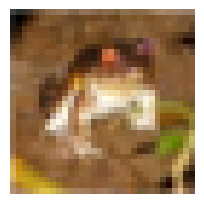

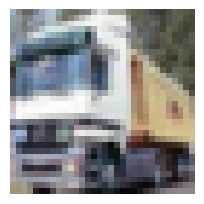

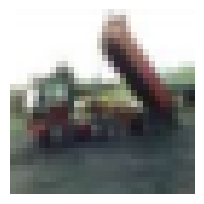

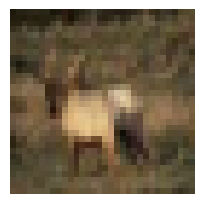

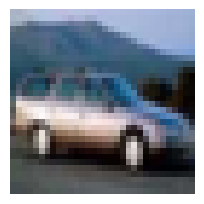

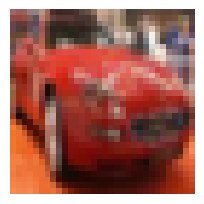

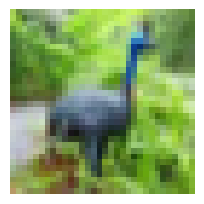

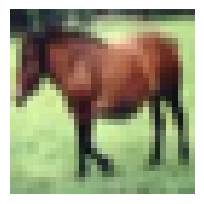

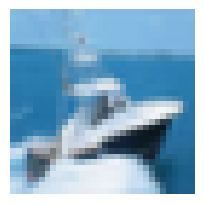

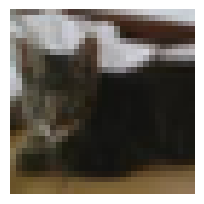

In [ ]:
# Q3. (1 point) Explain what is X_train? Visualize a first 10 rows.

# Answer: X_train contains images in 32*32 pixels and RGB Channel

import matplotlib as mpl
import matplotlib.pyplot as plt

nrows = 2
ncols = 5
plt.figure(figsize=(ncols * 1.2, nrows * 1.2))

for i in range(10):
  plt.figure(figsize=(ncols * 1.2, nrows * 1.2))
  plt.imshow(X_train[i],interpolation='nearest')
  plt.axis('off')
  plt.show()




In [ ]:
# (0 point) What is X_test shape?
X_test.shape

(10000, 32, 32, 3)

In [ ]:
# Q4. (1 point) Split X_train/y_train into X_train/y_train and X_valid/y_valid (keep X_test separate).
X_train_full = X_train
X_valid, X_train = X_train[:5000], X_train[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:]
...

print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)


(45000, 32, 32, 3) (45000, 1)
(5000, 32, 32, 3) (5000, 1)


In [ ]:
keras = tf.keras
layers = tf.keras.layers


In [ ]:
# Q5. (1 points) Create an MLP classifier model1 with 2 hidden layers of size 30 and 20,
# and appropriate input/normalization/output layers.

keras.backend.clear_session()

norm_layer = tf.keras.layers.Normalization()
norm_layer.adapt(X_train)
model1 = keras.models.Sequential()
model1.add(keras.layers.InputLayer(input_shape=[32, 32, 3]))
model1.add(norm_layer)
model1.add(keras.layers.Flatten(input_shape=[32, 32,3]))

model1.add(keras.layers.Dense(30, activation="relu"))
model1.add(keras.layers.LayerNormalization())
model1.add(keras.layers.Dense(20, activation="relu"))
model1.add(keras.layers.LayerNormalization())
model1.add(keras.layers.Dense(10, activation="softmax"))



/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Q6 (1 point) How many trainable and non-trainable params does model1 have?

# Answer:
model1.summary()



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 32, 32, 3)      │             7 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 30)             │        92,190 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_normalization             │ (None, 30)             │            60 │
│ (LayerNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 20)             │           620 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_normalization_1           │ (None, 20)             │            40 │
│ (LayerNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           210 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,127 (363.78 KB)

 Trainable params: 93,120 (363.75 KB)

 Non-trainable params: 7 (32.00 B)

In [ ]:
# Q7 (1 point) compile the model with Adam optimizer.
# What loss would you use? What additional metrics would you track?
# Train the model for 3 epochs. Use X_valid appropriately.

optimizer = keras.optimizers.Adam(learning_rate=0.001)

model1.compile(
    optimizer=optimizer,
    loss="sparse_categorical_crossentropy",
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]
)

history = model1.fit(X_train, y_train, epochs=3,
                   validation_data=(X_valid, y_valid))



Epoch 1/3
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - loss: 1.9151 - sparse_categorical_accuracy: 0.3260 - val_loss: 1.6373 - val_sparse_categorical_accuracy: 0.4182
Epoch 2/3
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 1.5965 - sparse_categorical_accuracy: 0.4359 - val_loss: 1.5686 - val_sparse_categorical_accuracy: 0.4436
Epoch 3/3
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 1.5104 - sparse_categorical_accuracy: 0.4659 - val_loss: 1.5316 - val_sparse_categorical_accuracy: 0.4494


In [ ]:
# Q8. (1 point) Instead of normalization layer, consider dividing each pixel
# with max value. Build and train model2 similar to model1 before but without
# the normalization layer.

keras.backend.clear_session()

X_train_2=X_train_full/255.0

X_valid_22, X_train_22 = X_train_2[:5000], X_train_2[5000:]

model2 = keras.models.Sequential()

model2.add(keras.layers.InputLayer(input_shape=[32,32, 3]))

model2.add(keras.layers.Flatten(input_shape=[32,32,3]))

model2.add(keras.layers.Dense(30, activation="relu"))

model2.add(keras.layers.Dense(20, activation="relu"))

model2.add(keras.layers.Dense(10, activation="softmax"))
print(model2.summary())




Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 30)             │        92,190 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 20)             │           620 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           210 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,020 (363.36 KB)

 Trainable params: 93,020 (363.36 KB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
X_train_22.shape,X_valid_22.shape


((45000, 32, 32, 3), (5000, 32, 32, 3))

In [ ]:
optimizer = keras.optimizers.Adam(learning_rate=0.001)

model2.compile(
    optimizer=optimizer,
    loss="sparse_categorical_crossentropy",
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]
)

history = model2.fit(X_train_22, y_train, epochs=3,
                   validation_data=(X_valid_22, y_valid))

Epoch 1/3
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 2.1625 - sparse_categorical_accuracy: 0.1817 - val_loss: 1.9829 - val_sparse_categorical_accuracy: 0.2492
Epoch 2/3
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 1.9709 - sparse_categorical_accuracy: 0.2520 - val_loss: 1.9527 - val_sparse_categorical_accuracy: 0.2610
Epoch 3/3
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 1.9474 - sparse_categorical_accuracy: 0.2588 - val_loss: 1.9161 - val_sparse_categorical_accuracy: 0.2702


In [ ]:


keras.backend.clear_session()

# Q9 (2 points) Build 3 towers, each looking at just a single color.
# Then concat them, and then do final output.

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_train, X_test = X_train / 255.0, X_test / 255.0

X_train_red = X_train[:, :, :, 0:1]
X_train_green = X_train[:, :, :, 1:2]
X_train_blue = X_train[:, :, :, 2:3]

X_test_red = X_test[:, :, :, 0:1]
X_test_green = X_test[:, :, :, 1:2]
X_test_blue = X_test[:, :, :, 2:3]

def build_mlp_tower(input_shape, X_channel_train):
    input_layer = keras.Input(shape=input_shape)

    norm_layer = keras.layers.Normalization()
    norm_layer.adapt(X_channel_train)

    x = norm_layer(input_layer)

    x = layers.Flatten()(x)
    x = layers.Dense(30, activation='relu')(x)
    x = layers.LayerNormalization()(x)
    x = layers.Dense(20, activation='relu')(x)
    x = layers.LayerNormalization()(x)

    return input_layer, x

i_red, t_red = build_mlp_tower((32, 32, 1), X_train_red)
i_green, t_green = build_mlp_tower((32, 32, 1), X_train_green)
i_blue, t_blue = build_mlp_tower((32, 32, 1), X_train_blue)

merged = layers.Concatenate()([t_red, t_green, t_blue])

output = layers.Dense(10, activation='softmax')(merged)

model = keras.Model(inputs=[i_red, i_green, i_blue], outputs=output)

print(model.summary())


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 32, 32, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_1       │ (None, 32, 32, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_2       │ (None, 32, 32, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 32, 32, 1) │          3 │ input_layer[0][0] │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_1     │ (None, 32, 32, 1) │          3 │ input_layer_1[0]… │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_2     │ (None, 32, 32, 1) │          3 │ input_layer_2[0]… │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 1024)      │          0 │ normalization[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_1 (Flatten) │ (None, 1024)      │          0 │ normalization_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_2 (Flatten) │ (None, 1024)      │          0 │ normalization_2[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 30)        │     30,750 │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 30)        │     30,750 │ flatten_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 30)        │     30,750 │ flatten_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalization │ (None, 30)        │         60 │ dense[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 30)        │         60 │ dense_2[0][0]     │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 30)        │         60 │ dense_4[0][0]     │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 20)        │        620 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 20)        │        620 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 20)        │        620 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 20)        │         40 │ dense_1[0][0]     │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 20)        │         40 │ dense_3[0][0]   

 Total params: 95,029 (371.22 KB)

 Trainable params: 95,020 (371.17 KB)

 Non-trainable params: 9 (48.00 B)

None


In [ ]:
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['sparse_categorical_accuracy']
)

model.fit([X_train_red, X_train_green, X_train_blue], y_train, epochs=3, validation_split=0.1)


Epoch 1/3
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - loss: 1.1362 - sparse_categorical_accuracy: 0.5997 - val_loss: 1.5640 - val_sparse_categorical_accuracy: 0.4616
Epoch 2/3
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 1.1321 - sparse_categorical_accuracy: 0.6030 - val_loss: 1.6106 - val_sparse_categorical_accuracy: 0.4454
Epoch 3/3
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 1.1133 - sparse_categorical_accuracy: 0.6098 - val_loss: 1.5669 - val_sparse_categorical_accuracy: 0.4712
